In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.cm as cm

import numpy as np

import skimage.transform
from scipy import ndimage
import scipy.misc

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.axis('off')
  plt.show()

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS

#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/ai-challenger/model/showattentell.finetune/', '')
  
import sys, os, math
import gezi, melt
import numpy as np

from deepiu.util import algos_factory
from deepiu.seq2seq.rnn_decoder import SeqDecodeMethod

#debug
from deepiu.util import text2ids

TEXT_MAX_WORDS = 100    
decode_max_words = 20

from deepiu.util import ids2text
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic-finetune/vocab.txt'
ids2text.init(vocab_path)

image_dir = image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'
image_path = os.path.join(image_dir, image_file)
image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_v4.ckpt'

FLAGS.model_dir = model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.inceptionV4.finetune.scene/'

image_model_name = melt.image.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
FLAGS.image_model_name = image_model_name
print(FLAGS.image_model_name)
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, feature_name='attention')
else:
  image_model = None
print('image_model', image_model)

import libpinyin
pinyin = libpinyin.Pinyin()
pinyin.Load('./data/pinyin/')

tensorflow_version: 1.4.0-rc1


INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic-finetune/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words
InceptionV4
image_model None


ENCODE_UNK 1


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

tough still here but not needed for inference

In [3]:
predictor = melt.TextPredictor(FLAGS.model_dir) 

load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.inceptionV4.finetune.scene/model.ckpt-30.27-1002000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.inceptionV4.finetune.scene/model.ckpt-30.27-1002000.map duration: 24.4291548729


In [ ]:
def predict(image_path, predictor, length_normalization_factor=0.25, num_show=1):
  img = melt.read_image(image_path)
  if image_model:
    feature = image_model.gen_feature(img) if image_model is not None else img
  else:
    feature = [img]

  timer = gezi.Timer()
  texts, scores = predictor.predict_text(feature)
  for i, (text, score) in enumerate(zip(texts[0], scores[0])):
    print(ids2text.ids2text(text), score)

  print('beam search using time(ms):', timer.elapsed_ms())

image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: a0e34cef392590fb0fd9a13027cf37d52c12b4d4


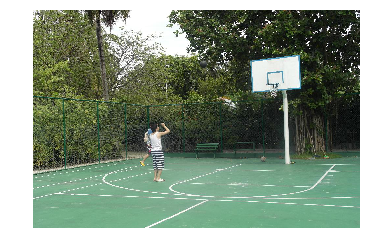

球场上 有 一个 右手 拿 着 球拍 的 男人 在 打 羽毛球 </S> 0.0931366
球场上 有 一个 右手 拿 着 球拍 的 男人 在 打网球 </S> 0.0898422
球场上 有 一个 右手 拿 着 球拍 的 女人 在 打网球 </S> 0.0845219
球场上 有 一个 右手 拿 着 球拍 的 女人 在 打 羽毛球 </S> 0.0803861
球场上 有 一个 右手 拿 着 球拍 的 人 在 打 羽毛球 </S> 0.0671163
一个 右手 拿 着 球拍 的 男人 在 球场上 打网球 </S> 0.0607941
平坦 的 球场上 有 一位 右手 拿 着 球拍 的 男士 在 打 羽毛球 </S> 0.059825
一个 右手 拿 着 球拍 的 男人 在 球场上 打 羽毛球 </S> 0.0534641
一个 右手 拿 着 球拍 的 女人 在 球场上 打网球 </S> 0.0532536
宽敞 的 球场上 有 一个 右手 拿 着 球拍 的 男人 在 打 羽毛球 </S> 0.0503914
beam search using time(ms): 10373.2750416
image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 42195bece99b2263aefa8a1fcbc11aa684e4fdf0


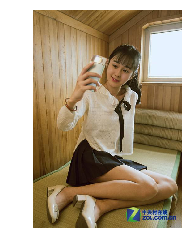

一个 右手 拿 着 杯子 的 女人 坐在 房间 里 的 沙发 上 </S> 0.112309
房间 里 有 一个 右手 拿 着 杯子 的 女人 坐在 床上 </S> 0.110976
一个 左手 拿 着 杯子 的 女人 坐在 房间 里 的 沙发 上 </S> 0.0930255
房间 里 有 一个 右手 拿 着 杯子 的 女人 坐在 沙发 上 </S> 0.0923327
一个 右手 拿 着 杯子 的 女人 坐在 室内 的 沙发 上 </S> 0.0845517
房间 里 有 一个 左手 拿 着 杯子 的 女人 坐在 床上 </S> 0.0815429
房间 里 有 一个 右手 拿 着 杯子 的 女人 坐在 垫子 上 </S> 0.0814999
一个 右手 拿 着 杯子 的 女人 坐在 房间 里 的 床上 </S> 0.0768323
房间 里 有 一个 右手 拿 着 杯子 的 女人 盘腿 坐在 垫子 上 </S> 0.0542231
一个 右手 拿 着 杯子 的 女人 盘腿 坐在 房间 里 的 垫子 上 </S> 0.0418879
beam search using time(ms): 1851.63283348
image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 03b64c98066f0f46ece6ca7dab77f4f9ed0bce53


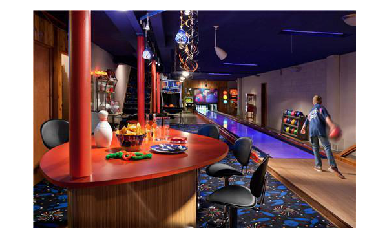

一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 走 在 大厅 里 </S> 0.00556122
一个 戴着 眼镜 的 男人 站 在 室内 的 桌子 旁 </S> 0.00451905
一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 站 在 大厅 里 </S> 0.00377782
一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 站 在 屋子里 </S> 0.00376198
一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 在 舞台 上 表演 </S> 0.00356416
一个 戴着 眼镜 的 男人 站 在 室内 的 柜台 旁 </S> 0.00348067
一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 站 在 房间 里 </S> 0.00344573
一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 站 在 房屋里 </S> 0.00340189
一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 站 在 房屋内 </S> 0.00338205
一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 站 在 整洁 的 室内 </S> 0.00289128
beam search using time(ms): 1119.04096603
image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 7faec9a7abd8c146b9b6a70e7340c7b8ff8dffc0


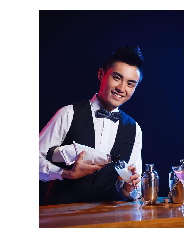

一个 右手 拿 着 酒杯 的 男人 坐在 室内 的 桌子 旁 </S> 0.0319358
一个 双手 拿 着 奖杯 的 男人 站 在 舞台 上 </S> 0.0308355
一个 右手 拿 着 笔 的 男人 坐在 室内 的 桌子 旁 </S> 0.028409
一个 双手 拿 着 奖杯 的 男人 坐在 室内 的 桌子 旁 </S> 0.0267305
一个 右手 拿 着 酒杯 的 男人 站 在 室内 的 桌子 旁 </S> 0.0252773
一个 右手 拿 着 奖杯 的 男人 坐在 室内 的 桌子 旁 </S> 0.0251024
一个 双手 拿 着 奖杯 的 男人 坐在 室内 的 椅子 上 </S> 0.0240454
一个 双手 拿 着 奖杯 的 男人 坐在 舞台 上 </S> 0.02184
一个 右手 拿 着 酒杯 的 男人 坐在 室内 的 椅子 上 </S> 0.0203113
一个 双手 拿 着 奖杯 的 男人 站 在 室内 的 桌子 旁 </S> 0.0202894
beam search using time(ms): 1176.47099495
image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 6e65197908d4514e038021e3b6b85d4e1f057545


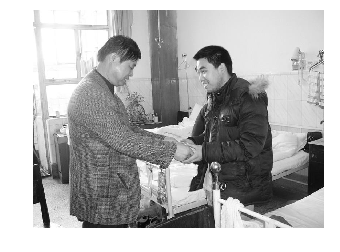

房间 里 有 一个 穿着 深色 外套 的 男人 在 给 一个 穿着 黑色 外套 的 男人 递 东西 </S> 0.00621107
房间 里 有 一个 穿着 深色 外套 的 男人 在 给 一个 穿着 黑色 外套 的 男人 递钱 </S> 0.00610347
一个 穿着 黑色 外套 的 男人 和 一个 穿着 黑色 外套 的 男人 在 房间 里 握手 </S> 0.00597161
房间 里 有 一个 穿着 黑色 外套 的 男人 在 给 一个 穿着 黑色 外套 的 男人 递钱 </S> 0.0059569
房间 里 有 一个 穿着 黑色 外套 的 男人 在 给 一个 穿着 黑色 外套 的 男人 递 东西 </S> 0.00544316
病房 里 有 一个 穿着 深色 外套 的 男人 在 给 一个 穿着 黑色 外套 的 男人 递钱 </S> 0.00485577
病房 里 有 一个 穿着 深色 外套 的 男人 在 给 一个 穿着 黑色 外套 的 男人 递 东西 </S> 0.00477242
房间 里 有 一个 穿着 深色 外套 的 男人 在 给 一个 穿着 深色 外套 的 男人 递 东西 </S> 0.00441604
房间 里 有 一个 穿着 深色 外套 的 男人 在 给 一个 穿着 黑色 上衣 的 男人 递 东西 </S> 0.00412048
病房 里 有 一个 穿着 深色 外套 的 男人 在 给 一个 穿着 深色 外套 的 男人 递 东西 </S> 0.00406549
beam search using time(ms): 1023.3361721
image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: e957528e9ddc3be3a779879f6feb40d69951d5db


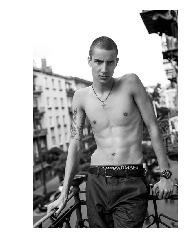

一个 右手 拉着 行李箱 的 男人 走 在 道路 上 </S> 0.0413661
道路 上 走 着 一个 右手 拉着 行李箱 的 男人 </S> 0.0390487
一个 左手 拉着 行李箱 的 男人 走 在 道路 上 </S> 0.0334418
道路 上 走 着 一个 左手 拉着 行李箱 的 男人 </S> 0.0288222
一个 右手 拉着 行李箱 的 男人 走 在 室外 的 道路 上 </S> 0.0177416
一个 穿着 黑色 裤子 的 男人 走 在 室外 的 护栏 旁 </S> 0.0160326
一个 穿着 黑色 裤子 的 男人 走 在 室外 的 栏杆 旁 </S> 0.0146675
一个 左手 拉着 行李箱 的 男人 走 在 室外 的 道路 上 </S> 0.01433
一个 穿着 黑色 裤子 的 男人 站 在 室外 的 栏杆 旁 </S> 0.0137645
一个 穿着 黑色 裤子 的 男人 走 在 室外 的 道路 上 </S> 0.0135488
beam search using time(ms): 895.049095154


In [ ]:
while True:
  image_name = raw_input('image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
        continue
  plt.subplot(1, 1, 1)
  image_show(image_path)
  predict(image_path, predictor)
  #predict(image_path, predictor2, gen_feature=False)

In [ ]:
import glob 
for img in glob.glob('/home/gezi/new2/data/ai_challenger/image_caption/test_pic/*.jpg'):
    image_show(img)
    predict(img, predictor)